In [ ]:
pip install opencv-contrib-python

In [ ]:
import cv2

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
#Model architecture
prototxt = "/content/MobileNetSSD_deploy.prototxt.txt"

In [ ]:
#Weight
model = "/content/MobileNetSSD_deploy.caffemodel"

In [ ]:
#Options
classes = {0:"background", 1:"avion", 2:"bicicleta",
          3:"pájaro", 4:"bote",
          5:"botella", 6:"colectivo",
          7:"auto", 8:"gato",
          9:"silla", 10:"vaca",
          11:"diningtable", 12:"perro",
          13:"caballo", 14:"motocicleta",
          15:"persona", 16:"planta",
          17:"oveja", 18:"sofa",
          19:"tren", 20:"television"}

In [ ]:
#Load the model
net = cv2.dnn.readNetFromCaffe(prototxt, model)

In [ ]:
#Read the image and preproccesing
image = cv2.imread("/content/drive/MyDrive/Reconocimiento/imagenes/oveja-caballo-persona.webp")
height, width, _ = image.shape
image_resized = cv2.resize(image, (300, 300))

In [ ]:
#Create a blob
blob = cv2.dnn.blobFromImage(image_resized, 0.007843, (300, 300), (127.5, 127.5, 127.5))
print("blob.shape:", blob.shape)

blob.shape: (1, 3, 300, 300)


In [ ]:
#Detections and predictions
net.setInput(blob)
detections = net.forward()
for detection in detections[0][0]:
     print(detection)
     label = classes[detection[1]]
     print("label: ", label)
     box = detection[3:7] * [width, height, width, height]
     x_start, y_start, x_end, y_end = int(box[0]), int(box[1]), int(box[2]), int(box[3])
     cv2.rectangle(image, (x_start, y_start), (x_end, y_end), (0, 255, 0), 2)
     cv2.putText(image, "Conf: {:.2f}".format(detection[2] * 100), (x_start, y_start - 5), 1, 1.2, (255, 0, 0), 2)
     cv2.putText(image, label, (x_start, y_start - 25), 1, 1.2, (255, 0, 0), 2)

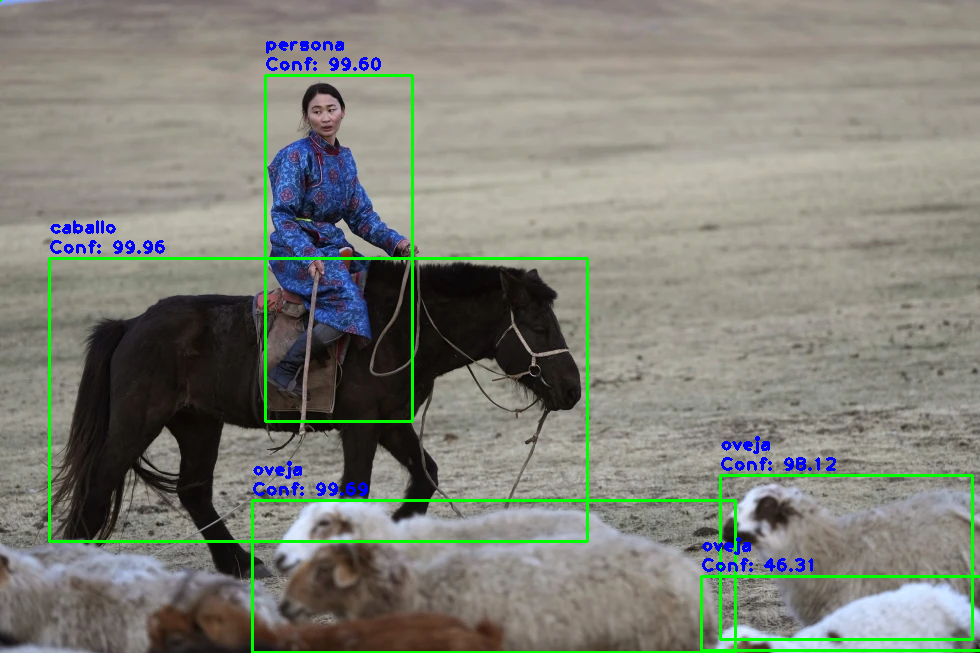

In [ ]:
#Show
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()